# Komplexität

Oft gibt es mehrere Algorithmen, die *das gleiche Problem* lösen – aber sie benötigen unterschiedlich viele Ressourcen.
Genau das beschreibt die **Komplexität** (Komplexitätstheorie/Analyse von Algorithmen).

```{admonition} Zeit- vs. Speicherkomplexität
:class: definition

- **Zeitkomplexität**: Wie viele elementare Rechenschritte (grob) benötigt ein Algorithmus in Abhängigkeit von der Eingabegröße $n$?
- **Speicherkomplexität**: Wie viel Speicher (z. B. Anzahl/Größe von Datenstrukturen) wird in Abhängigkeit von $n$ benötigt?
```

Wichtig: In der Regel interessiert uns nicht die genaue Zeit in Sekunden auf einem bestimmten Laptop, sondern wie stark der Aufwand wächst, wenn $n$ größer wird (*Skalierung*).

**Notation**

Wir beschreiben den Aufwand als Funktion $T(n)$ (Zeit) oder $S(n)$ (Speicher).
Dabei wird der Blick auf große $n$ gerichtet; Konstanten und unwichtige Terme werden „ignoriert“.

- $$O(\cdot)$$
  (*obere Schranke*): „Wächst höchstens so schnell wie …“
- $$\Omega(\cdot)$$
  (*untere Schranke*): „Wächst mindestens so schnell wie …“
- $$\Theta(\cdot)$$
  (*enge Schranke*): „Wächst ungefähr genau so schnell wie …“ (oben *und* unten)

Beispiel: $T(n)=3n+10$ ist $\Theta(n)$ (und damit auch $O(n)$).


**Mini-Beispiel**

Gegeben ist eine Liste `xs`:

```text
xs = [3, 1, 4, 1, 5]  # Duplikat: 1 kommt zweimal vor
```

**Fragestellung: Kommt ein Wert mindestens zweimal vorkommt?**

Wir können das Problem mit unterschiedlichen Algorithmen lösen:

- **Algorithmus A (ohne „Gedächtnis“)**: Wir nehmen ein Element und vergleichen es mit allen späteren Elementen. Wenn irgendwo ein gleicher Wert auftaucht, sind Duplikate gefunden. Diese Idee macht viele Vergleiche, braucht dafür aber kaum zusätzlichen Speicher.
- **Algorithmus B (mit „Gedächtnis“)**: Wir gehen die Liste einmal von vorne nach hinten durch und merken uns, welche Werte wir bereits gesehen haben (z. B. in einer Merkliste/„Sammlung“). Bei jedem neuen Wert prüfen wir zuerst: „Schon gesehen?“ – dann haben wir ein Duplikat. Diese Idee macht weniger Vergleiche, benötigt aber zusätzlichen Speicher für das Merken.

```{figure} ../../figs/03-computer-sciences-basics/algorithmus_comps.png
---
width: 900px
name: fig-algorithmus-comps
---
Zwei Lösungsstrategien für „Duplikat finden“: (A) viele Vergleiche ohne extra Speicher, (B) einmal durchlaufen und bereits gesehene Werte merken (mehr Speicher, typischerweise weniger Vergleiche).
```

Wir wollen nun wissen, welcher der beiden Algorithmen "schneller für große Datenmengen" ist, oder formal gesprochen: welcher der beiden Algorithmen besser skaliert in der Zeit.

Hierfür generieren wir einen Extremfall: wir erzeuge eine Liste mit Zahlenwerten, bei denen es keine Dupliakte gibt. Beide Algorithmen "müssen also bis zum Ende arbeiten":

In [1]:
# Mini-Beispiel ohne Duplikate (damit beide Algorithmen "bis zum Ende" arbeiten)
xs = [3, 1, 4, 2, 5]

Dann testen wir, wie lange die beiden Algorithmen „bis zum Ende“ brauchen – und zwar für eine kurze, eine mittellange und eine sehr lange Liste. Damit wir diese Listen nicht von Hand schreiben müssen, lassen wir sie uns von Python automatisch erzeugen. 

Der folgende Python-Code enthält die beiden Algorithmen, das Generieren der Zufallslisten und die Zeitmessung. Sie müssen den Quellcode an dieser Stelle noch nicht verstehen. Hier geht es vielmehr darum zu verstehen, wie sich die beiden Algorithmen unterscheiden.

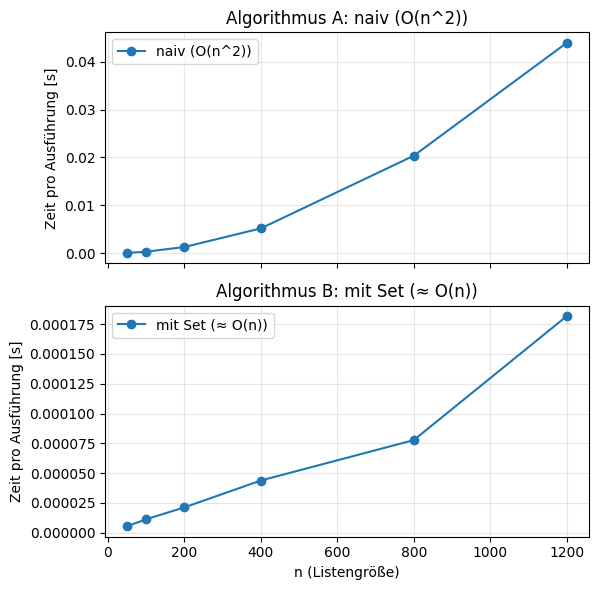

In [2]:
import random
import timeit
import matplotlib.pyplot as plt

def algorithmus_A(xs):
    n = len(xs)
    for i in range(n):
        for j in range(i + 1, n):
            if xs[i] == xs[j]:
                return True
    return False


def algorithmus_B(xs):
    seen = set()
    for x in xs:
        if x in seen:
            return True
        seen.add(x)
    return False

def make_data(n, seed=0):
    rng = random.Random(seed)
    # absichtlich ohne Duplikate, damit beide Algorithmen "bis zum Ende" arbeiten müssen
    return rng.sample(range(10 * n), k=n)


ns = [50, 100, 200, 400, 800, 1200]
t_quad = []
t_set = []

for n in ns:
    xs = make_data(n, seed=42)
    t_quad.append(timeit.timeit(lambda: algorithmus_A(xs), number=3) / 3)
    t_set.append(timeit.timeit(lambda: algorithmus_B(xs), number=200) / 200)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

ax1.plot(ns, t_quad, "o-", label="naiv (O(n^2))")
ax1.set_title("Algorithmus A: naiv (O(n^2))")
ax1.set_ylabel("Zeit pro Ausführung [s]")
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(ns, t_set, "o-", label="mit Set (≈ O(n))")
ax2.set_title("Algorithmus B: mit Set (≈ O(n))")
ax2.set_xlabel("n (Listengröße)")
ax2.set_ylabel("Zeit pro Ausführung [s]")
ax2.grid(True, alpha=0.3)
ax2.legend()

fig.tight_layout()
plt.show()

Das Diagramm zeigt, wie sich die Laufzeit verändert, wenn die Liste größer wird (mehr Elemente).
Man erkennt zwei unterschiedliche Wachstumsarten:

- **Algorithmus A** wächst deutlich steiler. Wenn sich die Listengröße ungefähr verdoppelt, steigt die benötigte Zeit *viel mehr* als doppelt. Das passt zu **quadratischem Wachstum** und damit zu einer Zeitkomplexität von ungefähr $O(n^2)$.
- **Algorithmus B** wächst deutlich flacher. Wenn sich die Listengröße verdoppelt, steigt die benötigte Zeit grob „im gleichen Verhältnis“. Das passt zu **linearem Wachstum** und damit zu ungefähr $O(n)$.

Die intuitive Erklärung: Algorithmus A vergleicht sehr viele Element-Paare (für jedes Element werden viele weitere geprüft). Algorithmus B geht einmal durch die Liste und nutzt zusätzliches „Gedächtnis“ (ein Set) zum Merken bereits gesehener Werte. Daher ist Algorithmus B für große $n$ oft deutlich schneller, bezahlt das aber mit mehr Speicher (das Set wächst mit).

Hinweis: Die Kurven hier sind eine **empirische Beobachtung** (Messung). Im Idealfall leitet man die Komplexität **analytisch** (durch eine mathematische Betrachtung) her. Messungen können die Tendenz gut sichtbar machen, hängen aber von Rechner, Implementierung und Messmethode ab.



```{admonition} Hinweis
Ein *proprietäres Format* ist ein Dateiformat, das nicht offen standardisiert ist und meist an ein bestimmtes Tool gebunden ist.

Beispiel: Wenn Sie ein Bauteil in CATIA als `.CATPart` speichern, können Sie die Geometrie in anderen CAD-Tools oft nicht direkt öffnen oder weiterbearbeiten. Häufig müssen Sie das Bauteil dafür erst in ein Austauschformat exportieren, z. B. als STEP-Datei (`.step`/`.stp`). STEP ist ein *offener Standard* für den Datenaustausch.
```

*Programmiercode* auch genannt *Quellcode*, *Source Code* oder kurz *Code*, ist das Resultat der *Programmierung* und Teil eines *Programms*.
Das heißt zur Ausführung des *Quellcodes* fehlt möglicherweise ein Teil des gesamten Codes.